In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [333]:
import pandas as pd

# URLs of the CSV files
urls = {
    "customers": "https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv",
    "engagements": "https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv",
    "marketing": "https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv",
    "transactions": "https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv"
}

# Read each CSV file into a DataFrame
customers_df = pd.read_csv(urls["customers"])
engagements_df = pd.read_csv(urls["engagements"])
marketing_df = pd.read_csv(urls["marketing"])
transactions_df = pd.read_csv(urls["transactions"])

# Merge DataFrames on 'customer_id'
merged_df = customers_df.merge(engagements_df, on="customer_id", how="left")
merged_df = merged_df.merge(marketing_df, on="customer_id", how="left")
merged_df = merged_df.merge(transactions_df, on="customer_id", how="left")


# Display the merged DataFrame
print(merged_df)

        customer_id   join_date last_purchase_date   age  gender  \
0                 1  2023-11-20         2024-03-17  56.0  Female   
1                 1  2023-11-20         2024-03-17  56.0  Female   
2                 1  2023-11-20         2024-03-17  56.0  Female   
3                 1  2023-11-20         2024-03-17  56.0  Female   
4                 1  2023-11-20         2024-03-17  56.0  Female   
...             ...         ...                ...   ...     ...   
327246        10000  2023-05-26         2023-09-01  67.0    Male   
327247        10000  2023-05-26         2023-09-01  67.0    Male   
327248        10000  2023-05-26         2023-09-01  67.0    Male   
327249        10000  2023-05-26         2023-09-01  67.0    Male   
327250        10000  2023-05-26         2023-09-01  67.0    Male   

                 location  number_of_site_visits  number_of_emails_opened  \
0       North Shannonbury                     10                       15   
1       North Shannonbury    

In [334]:
merged_df.describe()

,customer_id,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,transaction_id,transaction_amount
count,327251.000000,293971.000000,327251.000000,327251.000000,327251.000000,327251.000000,327251.000000,327251.000000
mean,5003.032587,43.444972,100.029146,39.560875,19.648481,12612.426086,64827.285341,596.577952
std,2878.441867,15.137623,118.224697,46.168791,22.826313,7263.449539,37349.075227,491.833026
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.020000
25%,2513.000000,30.000000,16.000000,6.000000,3.000000,6307.000000,32686.500000,227.020000
50%,5004.000000,43.000000,53.000000,22.000000,11.000000,12613.000000,64753.000000,437.710000
75%,7461.000000,57.000000,141.000000,57.000000,28.000000,18846.000000,96978.000000,846.800000
max,10000.000000,69.000000,711.000000,303.000000,142.000000,25200.000000,129545.000000,1999.990000


In [335]:
cx1 = merged_df[merged_df['customer_id'] == 1]

In [336]:
cx1.head()

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,response,promotion_type,campaign_date,transaction_id,transaction_date,transaction_amount,product_category
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,1,2024-02-03,165.56,Clothing
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,2,2024-03-02,699.01,Home Goods
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,3,2024-03-12,146.86,Home Goods
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,4,2024-01-20,927.46,Electronics
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,5,2024-02-25,1395.87,Electronics


In [337]:
# Exploring Customer 1 data
cx1.describe()
cx1

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,response,promotion_type,campaign_date,transaction_id,transaction_date,transaction_amount,product_category
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,1,2024-02-03,165.56,Clothing
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,2,2024-03-02,699.01,Home Goods
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,3,2024-03-12,146.86,Home Goods
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,4,2024-01-20,927.46,Electronics
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,5,2024-02-25,1395.87,Electronics
5,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,6,2024-01-09,174.72,Clothing
6,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,No,Discount,2024-01-24,1,2024-02-03,165.56,Clothing
7,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,No,Discount,2024-01-24,2,2024-03-02,699.01,Home Goods
8,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,No,Discount,2024-01-24,3,2024-03-12,146.86,Home Goods
9,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,No,Discount,2024-01-24,4,2024-01-20,927.46,Electronics


In [338]:
#Customer has 6 receipts where they bought 4 different things each time
ts = cx1['response'].value_counts()
print(ts)


response
No     18
Yes     6
Name: count, dtype: int64


In [339]:
cx2 = merged_df[merged_df['customer_id'] == 2]

In [340]:
cx2.head()

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,response,promotion_type,campaign_date,transaction_id,transaction_date,transaction_amount,product_category
24,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,5,Yes,Free Shipping,2022-07-08,7,2022-05-05,443.99,Electronics
25,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,5,Yes,Free Shipping,2022-07-08,8,2023-01-03,492.16,Clothing
26,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,5,Yes,Free Shipping,2022-07-08,9,2021-12-11,910.21,Electronics
27,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,5,Yes,Free Shipping,2022-07-08,10,2022-10-20,42.29,Clothing
28,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,5,Yes,Free Shipping,2022-07-08,11,2021-09-29,1866.56,Electronics


In [341]:
average_spending = merged_df.groupby('customer_id')['transaction_amount'].mean()

In [342]:
#Average spending per each customer
average_spending.describe()

count    10000.000000
mean       599.842451
std        197.350557
min         23.810000
25%        488.343409
50%        587.587333
75%        692.701750
max       1997.080000
Name: transaction_amount, dtype: float64

In [343]:
unique_cx = merged_df['customer_id'].value_counts()

In [344]:
unique_cx.describe()

count    10000.000000
mean        32.725100
std         24.707003
min          1.000000
25%         13.000000
50%         25.000000
75%         48.000000
max        100.000000
Name: count, dtype: float64

In [345]:
merged_df

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,response,promotion_type,campaign_date,transaction_id,transaction_date,transaction_amount,product_category
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,1,2024-02-03,165.56,Clothing
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,2,2024-03-02,699.01,Home Goods
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,3,2024-03-12,146.86,Home Goods
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,4,2024-01-20,927.46,Electronics
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,5,2024-02-25,1395.87,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327246,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,Yes,Discount,2023-06-18,129541,2023-05-27,371.70,Home Goods
327247,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,Yes,Discount,2023-06-18,129542,2023-06-11,1245.23,Electronics
327248,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,Yes,Discount,2023-06-18,129543,2023-06-28,745.74,Electronics
327249,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,Yes,Discount,2023-06-18,129544,2023-07-21,587.37,Home Goods


In [346]:
#Total Amount spent per user
total_spend = merged_df.groupby('customer_id')['transaction_amount'].sum()

In [347]:
total_spend.head().reset_index()

,customer_id,transaction_amount
0,1,14037.92
1,2,24325.28
2,3,2909.74
3,4,31498.72
4,5,62098.20


In [348]:
# Example analysis: Relationship between total purchases and clicks
total_purchases = transactions_df.groupby('customer_id')['transaction_amount'].sum().reset_index()
total_purchases.rename(columns={'transaction_amount': 'total_purchases'}, inplace=True)
total_clicks = engagements_df.groupby('customer_id')['number_of_clicks'].sum().reset_index()
total_clicks.rename(columns={'number_of_clicks': 'total_clicks'}, inplace=True)
analysis_df = total_purchases.merge(total_clicks, on='customer_id')

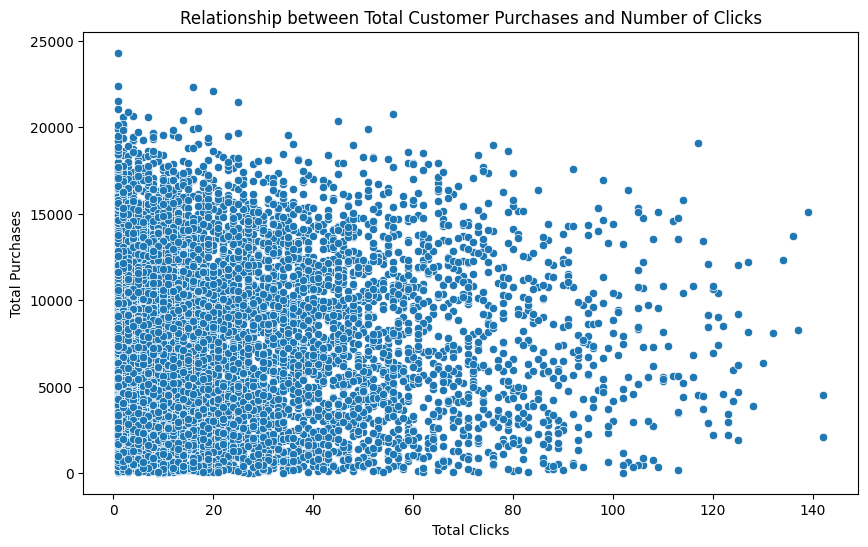

In [349]:
# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_clicks', y='total_purchases', data=analysis_df)
plt.title('Relationship between Total Customer Purchases and Number of Clicks')
plt.xlabel('Total Clicks')
plt.ylabel('Total Purchases')
plt.show()

In [350]:
correlation = analysis_df['total_clicks'].corr(analysis_df['total_purchases'])
print(f"Correlation between total clicks and total purchases: {correlation}")


Correlation between total clicks and total purchases: -0.012684854839710671


In [351]:
merged_df

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,response,promotion_type,campaign_date,transaction_id,transaction_date,transaction_amount,product_category
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,1,2024-02-03,165.56,Clothing
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,2,2024-03-02,699.01,Home Goods
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,3,2024-03-12,146.86,Home Goods
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,4,2024-01-20,927.46,Electronics
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,5,2024-02-25,1395.87,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327246,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,Yes,Discount,2023-06-18,129541,2023-05-27,371.70,Home Goods
327247,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,Yes,Discount,2023-06-18,129542,2023-06-11,1245.23,Electronics
327248,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,Yes,Discount,2023-06-18,129543,2023-06-28,745.74,Electronics
327249,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,Yes,Discount,2023-06-18,129544,2023-07-21,587.37,Home Goods


In [352]:
amount_of_purchases = merged_df.groupby('customer_id')['transaction_id'].sum().reset_index()
amount_of_purchases

,customer_id,transaction_id
0,1,84
1,2,396
2,3,222
3,4,2520
4,5,5136
...,...,...
9995,9996,3885105
9996,9997,1554174
9997,9998,388566
9998,9999,3108708


In [353]:
#Engagement scores

promotions = merged_df['promotion_type'].value_counts().reset_index()
promotions

,promotion_type,count
0,Discount,109939
1,Buy One Get One,108739
2,Free Shipping,108573


In [354]:
product_categories = merged_df['product_category'].value_counts().reset_index()
product_categories

,product_category,count
0,Electronics,109800
1,Clothing,109382
2,Home Goods,108069


In [355]:
# Lets find Engagement patterns
promo_price = merged_df.groupby('promotion_type')['transaction_amount'].sum().reset_index()
promo_price

,promotion_type,transaction_amount
0,Buy One Get One,64768255.06
1,Discount,65677357.16
2,Free Shipping,64785119.01


In [356]:
engage_email = merged_df.groupby('customer_id')['number_of_emails_opened'].value_counts().reset_index()
engage_email

,customer_id,number_of_emails_opened,count
0,1,15,24
1,2,49,36
2,3,73,12
3,4,30,80
4,5,2,96
...,...,...,...
9995,9996,47,30
9996,9997,33,12
9997,9998,17,3
9998,9999,5,24


In [357]:

total_transactions = merged_df.groupby('customer_id').size().reset_index(name=('total_transactions'))
total_transactions

,customer_id,total_transactions
0,1,24
1,2,36
2,3,12
3,4,80
4,5,96
...,...,...
9995,9996,30
9996,9997,12
9997,9998,3
9998,9999,24


In [358]:
#Calculating Customer Responsiveness to Campaign Rate
merged_df['response'].value_counts()

response
No     164016
Yes    163235
Name: count, dtype: int64

In [359]:
merged_df['response'] = merged_df['response'].map({'Yes': 1, 'No': 0})

merged_df

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,response,promotion_type,campaign_date,transaction_id,transaction_date,transaction_amount,product_category
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,1,2024-02-03,165.56,Clothing
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,2,2024-03-02,699.01,Home Goods
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,3,2024-03-12,146.86,Home Goods
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,4,2024-01-20,927.46,Electronics
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,5,2024-02-25,1395.87,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327246,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,1,Discount,2023-06-18,129541,2023-05-27,371.70,Home Goods
327247,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,1,Discount,2023-06-18,129542,2023-06-11,1245.23,Electronics
327248,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,1,Discount,2023-06-18,129543,2023-06-28,745.74,Electronics
327249,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,1,Discount,2023-06-18,129544,2023-07-21,587.37,Home Goods


In [360]:
response_rate = merged_df.groupby('customer_id')['response'].mean().reset_index()
response_rate.rename(columns={'response': 'response_rate'}, inplace=True)

merged_df = merged_df.merge(response_rate, on='customer_id', how='left')

merged_df

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,response,promotion_type,campaign_date,transaction_id,transaction_date,transaction_amount,product_category,response_rate
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,1,2024-02-03,165.56,Clothing,0.25
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,2,2024-03-02,699.01,Home Goods,0.25
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,3,2024-03-12,146.86,Home Goods,0.25
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,4,2024-01-20,927.46,Electronics,0.25
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,5,2024-02-25,1395.87,Electronics,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327246,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,1,Discount,2023-06-18,129541,2023-05-27,371.70,Home Goods,0.50
327247,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,1,Discount,2023-06-18,129542,2023-06-11,1245.23,Electronics,0.50
327248,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,1,Discount,2023-06-18,129543,2023-06-28,745.74,Electronics,0.50
327249,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,25200,1,Discount,2023-06-18,129544,2023-07-21,587.37,Home Goods,0.50


In [361]:
#Calculating engagement score ** ADD THE ABOVE RESPONSE RATE METRIC INTO THIS ***

engagement_df = total_clicks.merge(total_purchases, on='customer_id')
engagement_df = engagement_df.merge(total_transactions, on='customer_id')

engagement_df = engagement_df.merge(response_rate, on='customer_id')

In [362]:
scaler = MinMaxScaler()
engagement_df[['total_clicks', 'total_purchases', 'total_transactions','response_rate']] = scaler.fit_transform(engagement_df[['total_clicks', 'total_purchases', 'total_transactions', 'response_rate']].fillna(0))

In [363]:
engagement_df['engagement_score'] = (engagement_df['total_clicks'] + engagement_df['total_purchases'] + engagement_df['total_transactions'] + engagement_df['response_rate']) / 4

In [364]:
merged_df['engagement_score'] = engagement_df[['total_clicks', 'total_purchases', 'total_transactions', 'response_rate']].mean(axis=1)


In [374]:
merged_df.head()


,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,response,promotion_type,campaign_date,transaction_id,transaction_date,transaction_amount,product_category,response_rate,engagement_score
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,1,2024-02-03,165.56,Clothing,0.25,0.156479
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,2,2024-03-02,699.01,Home Goods,0.25,0.364422
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,3,2024-03-12,146.86,Home Goods,0.25,0.210069
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,4,2024-01-20,927.46,Electronics,0.25,0.371219
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,0,Buy One Get One,2024-02-29,5,2024-02-25,1395.87,Electronics,0.25,0.410178


In [367]:
#Customer Stats table (aggregated)

customer_stats = merged_df.groupby('customer_id').agg(
    total_purchase_amount=pd.NamedAgg(column='transaction_amount', aggfunc='sum'),
    total_transactions=pd.NamedAgg(column='transaction_amount', aggfunc='count'),
    total_clicks=pd.NamedAgg(column='number_of_clicks', aggfunc='sum'),
    average_purchase_value=pd.NamedAgg(column='transaction_amount', aggfunc='mean'),
    engagement_score=pd.NamedAgg(column='engagement_score', aggfunc='mean'),
    response_rate=pd.NamedAgg(column='response_rate', aggfunc='mean')
    
).reset_index()

customer_stats

,customer_id,total_purchase_amount,total_transactions,total_clicks,average_purchase_value,engagement_score,response_rate
0,1,14037.92,24,24,584.913333,0.344893,0.25
1,2,24325.28,36,1836,675.702222,0.281194,0.50
2,3,2909.74,12,300,242.478333,0.289130,0.50
3,4,31498.72,80,1360,393.734000,0.321102,0.25
4,5,62098.20,96,672,646.856250,0.295417,0.00
...,...,...,...,...,...,...,...
9995,9996,16494.60,30,480,549.820000,NaN,0.00
9996,9997,5848.30,12,168,487.358333,NaN,1.00
9997,9998,3503.13,3,15,1167.710000,NaN,1.00
9998,9999,13443.72,24,96,560.155000,NaN,0.00


In [372]:
#Aggregate customer data by customer_IDs (THis is the full historical customer lifetime value table)

customer_stats = merged_df.groupby('customer_id').agg(
    
    total_purchase_amount=pd.NamedAgg(column='transaction_amount', aggfunc='sum'),
    total_transactions=pd.NamedAgg(column='transaction_amount', aggfunc='count'),
    total_clicks=pd.NamedAgg(column='number_of_clicks', aggfunc='sum'),
    average_purchase_value=pd.NamedAgg(column='transaction_amount', aggfunc='mean'),
    engagement_score=pd.NamedAgg(column='engagement_score', aggfunc='mean'),
    response_rate=pd.NamedAgg(column='response_rate', aggfunc='mean')
    
).reset_index()

customer_stats

,customer_id,total_purchase_amount,total_transactions,total_clicks,average_purchase_value,engagement_score,response_rate
0,1,14037.92,24,24,584.913333,0.344893,0.25
1,2,24325.28,36,1836,675.702222,0.281194,0.50
2,3,2909.74,12,300,242.478333,0.289130,0.50
3,4,31498.72,80,1360,393.734000,0.321102,0.25
4,5,62098.20,96,672,646.856250,0.295417,0.00
...,...,...,...,...,...,...,...
9995,9996,16494.60,30,480,549.820000,NaN,0.00
9996,9997,5848.30,12,168,487.358333,NaN,1.00
9997,9998,3503.13,3,15,1167.710000,NaN,1.00
9998,9999,13443.72,24,96,560.155000,NaN,0.00


In [391]:
historical_CLV = customer_stats.groupby('customer_id')['total_purchase_amount'].value_counts().sort_values(ascending=False).reset_index()
historical_CLV

,customer_id,total_purchase_amount,count
0,1,14037.92,1
1,6671,6667.52,1
2,6664,49713.64,1
3,6665,34976.94,1
4,6666,21590.20,1
...,...,...,...
9995,3334,21607.46,1
9996,3335,12508.93,1
9997,3336,14052.33,1
9998,3337,11645.20,1
